In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [10]:
# Print the city count to confirm sufficient count
len(cities)

609

In [11]:
# Convert city list to dataframe and rename column to "city"
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,albany
1,puerto ayora
2,rikitea
3,khatanga
4,kiruna


In [12]:
# Add columns to cities dataframe
cities_df["Cloudiness"] = np.nan
cities_df["Country"] = np.nan
cities_df["Date"] = np.nan
cities_df["Humidity"] = np.nan
cities_df["Lat"] = np.nan
cities_df["Lng"] = np.nan
cities_df["Max Temp"] = np.nan
cities_df["Wind Speed"] = np.nan
cities_df.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,puerto ayora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rikitea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,khatanga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kiruna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform API Calls
-  Perform a weather check on each city using a series of successive API calls.
-  Include a print log of each city as it's being processed (with the city number and city name).

In [15]:
# Save config information
print("Beginning Data Retrieval")
print("___________________________")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

# Use iterrows to loop through dataframe using the city name

for index, row in cities_df.iterrows():
    city = row["city"]
    print(f"Retrieving Results for Index {index}: {city}")
    response = requests.get(query_url + city).json()
    
    try:      
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found...Skipping.")

Beginning Data Retrieval
___________________________
Retrieving Results for Index 0: albany
Processing Record 0 | albany
Retrieving Results for Index 1: puerto ayora
Processing Record 1 | puerto ayora
Retrieving Results for Index 2: rikitea
Processing Record 2 | rikitea
Retrieving Results for Index 3: khatanga
Processing Record 3 | khatanga
Retrieving Results for Index 4: kiruna
Processing Record 4 | kiruna
Retrieving Results for Index 5: lebu
Processing Record 5 | lebu
Retrieving Results for Index 6: vostok
Processing Record 6 | vostok
Retrieving Results for Index 7: leningradskiy
Processing Record 7 | leningradskiy
Retrieving Results for Index 8: bilibino
Processing Record 8 | bilibino
Retrieving Results for Index 9: barrow
Processing Record 9 | barrow
Retrieving Results for Index 10: torbay
Processing Record 10 | torbay
Retrieving Results for Index 11: alofi
Processing Record 11 | alofi
Retrieving Results for Index 12: kapiri mposhi
Processing Record 12 | kapiri mposhi
Retrieving Re

Processing Record 113 | yanam
Retrieving Results for Index 114: saint-philippe
Processing Record 114 | saint-philippe
Retrieving Results for Index 115: fairbanks
Processing Record 115 | fairbanks
Retrieving Results for Index 116: pennagaram
Processing Record 116 | pennagaram
Retrieving Results for Index 117: bluff
Processing Record 117 | bluff
Retrieving Results for Index 118: muzhi
Processing Record 118 | muzhi
Retrieving Results for Index 119: beringovskiy
Processing Record 119 | beringovskiy
Retrieving Results for Index 120: dikson
Processing Record 120 | dikson
Retrieving Results for Index 121: mae sai
Processing Record 121 | mae sai
Retrieving Results for Index 122: lamu
Processing Record 122 | lamu
Retrieving Results for Index 123: talakan
Processing Record 123 | talakan
Retrieving Results for Index 124: touros
Processing Record 124 | touros
Retrieving Results for Index 125: velyka mykhaylivka
Processing Record 125 | velyka mykhaylivka
Retrieving Results for Index 126: sao joao d

Processing Record 222 | agapovka
Retrieving Results for Index 223: tual
Processing Record 223 | tual
Retrieving Results for Index 224: tambopata
City not found...Skipping.
Retrieving Results for Index 225: alice springs
Processing Record 225 | alice springs
Retrieving Results for Index 226: palmer
Processing Record 226 | palmer
Retrieving Results for Index 227: sovetskiy
Processing Record 227 | sovetskiy
Retrieving Results for Index 228: cockburn town
Processing Record 228 | cockburn town
Retrieving Results for Index 229: hof
Processing Record 229 | hof
Retrieving Results for Index 230: warman
Processing Record 230 | warman
Retrieving Results for Index 231: maridi
City not found...Skipping.
Retrieving Results for Index 232: broken hill
Processing Record 232 | broken hill
Retrieving Results for Index 233: luderitz
Processing Record 233 | luderitz
Retrieving Results for Index 234: hay river
Processing Record 234 | hay river
Retrieving Results for Index 235: skibbereen
Processing Record 2

Processing Record 332 | tuy hoa
Retrieving Results for Index 333: yulara
Processing Record 333 | yulara
Retrieving Results for Index 334: victor harbor
Processing Record 334 | victor harbor
Retrieving Results for Index 335: margate
Processing Record 335 | margate
Retrieving Results for Index 336: garden city
Processing Record 336 | garden city
Retrieving Results for Index 337: kemise
Processing Record 337 | kemise
Retrieving Results for Index 338: salalah
Processing Record 338 | salalah
Retrieving Results for Index 339: cacu
Processing Record 339 | cacu
Retrieving Results for Index 340: qaqortoq
Processing Record 340 | qaqortoq
Retrieving Results for Index 341: sarangani
Processing Record 341 | sarangani
Retrieving Results for Index 342: sola
Processing Record 342 | sola
Retrieving Results for Index 343: uarini
Processing Record 343 | uarini
Retrieving Results for Index 344: plymouth
Processing Record 344 | plymouth
Retrieving Results for Index 345: solovetskiy
City not found...Skippin

Processing Record 443 | san jose
Retrieving Results for Index 444: marawi
Processing Record 444 | marawi
Retrieving Results for Index 445: sept-iles
Processing Record 445 | sept-iles
Retrieving Results for Index 446: tarauaca
Processing Record 446 | tarauaca
Retrieving Results for Index 447: nemuro
Processing Record 447 | nemuro
Retrieving Results for Index 448: palanga
Processing Record 448 | palanga
Retrieving Results for Index 449: nogliki
Processing Record 449 | nogliki
Retrieving Results for Index 450: east wenatchee bench
Processing Record 450 | east wenatchee bench
Retrieving Results for Index 451: shimoda
Processing Record 451 | shimoda
Retrieving Results for Index 452: orlik
Processing Record 452 | orlik
Retrieving Results for Index 453: mayo
Processing Record 453 | mayo
Retrieving Results for Index 454: apac
Processing Record 454 | apac
Retrieving Results for Index 455: lerwick
Processing Record 455 | lerwick
Retrieving Results for Index 456: gilazi
City not found...Skipping.

Processing Record 553 | robertson
Retrieving Results for Index 554: terney
Processing Record 554 | terney
Retrieving Results for Index 555: mosquera
Processing Record 555 | mosquera
Retrieving Results for Index 556: palma del rio
Processing Record 556 | palma del rio
Retrieving Results for Index 557: columbus
Processing Record 557 | columbus
Retrieving Results for Index 558: malgobek
Processing Record 558 | malgobek
Retrieving Results for Index 559: kodinsk
Processing Record 559 | kodinsk
Retrieving Results for Index 560: albert lea
Processing Record 560 | albert lea
Retrieving Results for Index 561: tilichiki
Processing Record 561 | tilichiki
Retrieving Results for Index 562: dubbo
Processing Record 562 | dubbo
Retrieving Results for Index 563: labuhan
Processing Record 563 | labuhan
Retrieving Results for Index 564: polson
Processing Record 564 | polson
Retrieving Results for Index 565: lubango
Processing Record 565 | lubango
Retrieving Results for Index 566: ardakan
Processing Recor

In [18]:
# Confirm API call data has been entered into the dataframe
cities_df.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,90.0,US,1.569521e+09,77.0,42.65,-73.75,66.20,5.82
1,puerto ayora,75.0,EC,1.569521e+09,69.0,-0.74,-90.35,75.20,11.41
2,rikitea,70.0,PF,1.569521e+09,72.0,-23.12,-134.97,70.94,9.93
3,khatanga,100.0,RU,1.569521e+09,97.0,71.98,102.47,32.42,11.03
4,kiruna,33.0,SE,1.569521e+09,81.0,67.86,20.23,48.20,6.02


In [19]:
#Figure out what kind of data is being held in each column
cities_df.dtypes

city           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [20]:
# Convert Date from Epoch time to Date Time 
#cities_df["Date"] = cities_df["Date"].to_datetime(unit='s')

In [21]:
# Export dataframe to csv file
output_data_file = cities_df.to_csv(r"cities.csv")

## Latitude vs. Temperature Plot

In [22]:
cities_df.count()

city          609
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

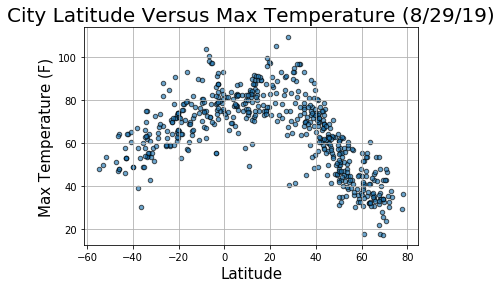

In [24]:
cities_df.plot.scatter(x ='Lat', y ='Max Temp', marker = "o", 
               facecolors = "red", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Max Temperature (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.savefig("Images/latitude.png")

## Latitude vs. Humidity Plot

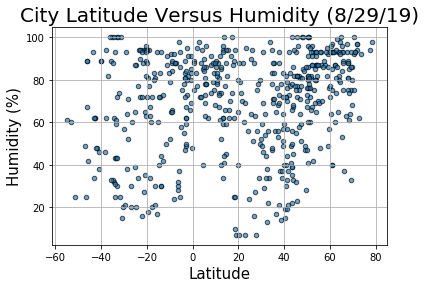

In [25]:
cities_df.plot.scatter(x ="Lat", y ="Humidity", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Humidity (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity (%)", size = 15) 
plt.savefig("Images/humidity.png")

## Latitude vs. Cloudiness Plot

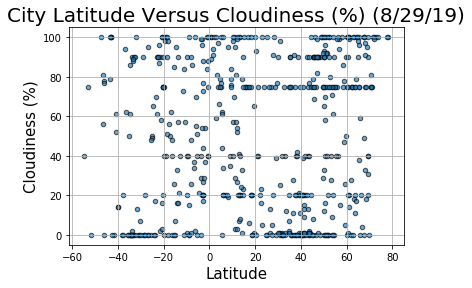

In [26]:
cities_df.plot.scatter(x ="Lat", y ="Cloudiness", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Cloudiness (%) (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness (%)", size = 15)
plt.savefig("Images/cloudiness.png")

## Latitude vs. Wind Speed Plot

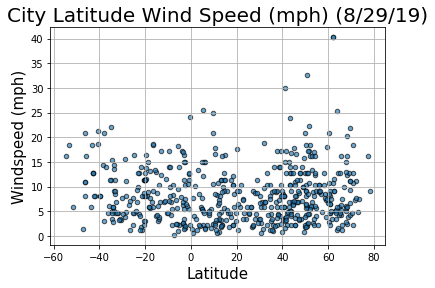

In [27]:
cities_df.plot.scatter(x ="Lat", y ="Wind Speed", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Wind Speed (mph) (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Windspeed (mph)", size = 15)
plt.savefig("Images/windspeed.png")

### Observable Trends

1.  The areas directly at and just outside of the equator have higher temperatures those areas further away from the equator. 

2.  The only clear pattern when observing latitude's impact on temperature, humidity, cloudiness, and windspeed is seen in the temperature plot where there is a clear arc illustrating that higher temperatures are seen as you move closer to the equator.  The plots capturing latitude's impact on humidity, cloudiness and windspeed seem to have less of a consistent trend.